# Q3. Logistic Regression

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# tesing n-dim mean/std on numpy

# xx = np.array([[5,2],[20,8]])
# print(xx.mean(axis=0), xx.mean(axis=1), xx.mean())
# xx.std(axis=0)

(a) Binary Classification

In [12]:
def std_normalize(X: np.ndarray):
    X_mu = X.mean(axis=0)
    X_std = X.std(axis=0)
    return (X-X_mu)/X_std

def sigmoid(X: np.ndarray):
    return 1/(1+np.exp(-X))


In [13]:
def hypo(X,theta):
    sig_p = sigmoid(X@theta)
    mul = (sig_p*(1-sig_p)).sum()
    return (-X.T@X) * mul

def grad_sig(X,Y,theta):
    diff = Y-sigmoid(X@theta)
    return X.T@diff

def newtonMethod(X,Y,theta,n_iter=1000):
    for i in range(n_iter):
        inv_h = np.linalg.inv(hypo(X,theta))
        grad = grad_sig(X,Y,theta)
        theta -= inv_h@grad
        
    return theta

In [14]:
# test train split or no??

X_train = np.loadtxt("../data/q3/logisticX.csv", delimiter=',')
Y_train = np.loadtxt("../data/q3/logisticY.csv")
m = len(X_train)

X_norm = std_normalize(X_train)
X = np.column_stack([np.ones(m),X_norm])

Y = Y_train.reshape(-1,1)

In [15]:
theta_0 = np.zeros(3).reshape(-1,1)

theta = newtonMethod(X,Y,theta_0)
print("Final theta:")
print(theta)

Final theta:
[[ 0.26741615]
 [ 2.1916131 ]
 [-2.28892988]]


In [16]:
Y_pred = sigmoid(X@theta)
Y_pred = np.where(Y_pred>0.5,1,0)

(b) Plot of training data vs boundary

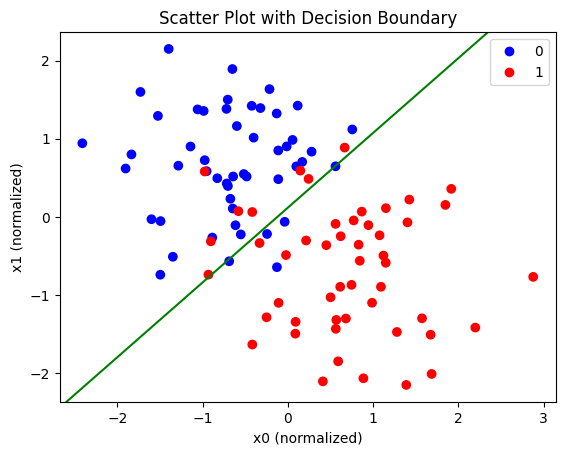

In [17]:
x0 = X.T[1]
x1 = X.T[2]

s = plt.scatter(x0,x1,c=Y,cmap="bwr")

plt.axline((0, -theta[0][0]/theta[2][0]), slope = -theta[1][0]/theta[2][0], color='g', label='Boundary')

plt.title('Scatter Plot with Decision Boundary')
plt.xlabel('x0 (normalized)')
plt.ylabel('x1 (normalized)')

plt.legend(handles=s.legend_elements()[0], labels=['0','1'])

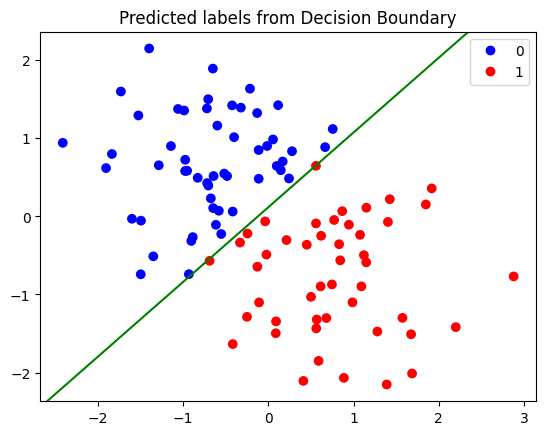

In [20]:
# estimated classification from decision boundary

plt.title('Predicted labels from Decision Boundary')
plt.scatter(x0,x1,c=Y_pred,cmap="bwr")
plt.axline((0, -theta[0][0]/theta[2][0]), slope = -theta[1][0]/theta[2][0], color='g', label='Boundary')

plt.legend(handles=s.legend_elements()[0], labels=['0','1'])